# Explore District Heating and Kinergy Data

This notebook will

- show the data distribution (how many gas, how many district heating sensors)
- compare statistics about gas and district heating data
- show where the sensors are located
- find missing data spans

## Load Data

In [196]:
import polars as pl

from src.energy_forecast.config import RAW_DATA_DIR, DATA_DIR

dh_hourly = RAW_DATA_DIR / "district_heating_hourly.csv"
dh_daily = RAW_DATA_DIR / "district_heating_daily.csv"
kinergy_daily = RAW_DATA_DIR / "kinergy_daily.csv"
kinergy_hourly = RAW_DATA_DIR / "kinergy_hourly.csv"
legacy_daily = DATA_DIR / "legacy_data" / "legacy_systen_counter_daily_values.csv"

In [197]:
col_list = ["id", "date", "diff", "primary_energy", "adresse", "ort", "plz", "source"]

In [198]:
df_sum = pl.DataFrame({"source": pl.Series(["district heating", "kinergy", "legacy"])})
df_sum  # summary dataframe

source
str
"""district heating"""
"""kinergy"""
"""legacy"""


### Daily Data

In [199]:
df_dh_daily = pl.read_csv(dh_daily)
df_dh_daily = df_dh_daily.with_columns(pl.col("date").str.to_date(),
                                       pl.lit("district heating").alias("source"),
                                       pl.concat_str([pl.col("eco_u_id"), pl.col("data_provider_id")]).alias("id")
                                       ).select(col_list)
df_dh_daily

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-09-30,147.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-01,295.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-02,253.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-03,315.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-04,245.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
…,…,…,…,…,…,…,…
"""fb5cc271-ae15-4f24-b9d5-30782b…",2024-05-10,10.0,"""district heating""","""Moorbekstraße 33""","""Norderstedt""",22846,"""district heating"""
"""fb5cc271-ae15-4f24-b9d5-30782b…",2024-05-11,15.0,"""district heating""","""Moorbekstraße 33""","""Norderstedt""",22846,"""district heating"""
"""fb5cc271-ae15-4f24-b9d5-30782b…",2024-05-12,16.0,"""district heating""","""Moorbekstraße 33""","""Norderstedt""",22846,"""district heating"""


In [200]:
df_kinergy_daily = pl.read_csv(kinergy_daily)
df_kinergy_daily = df_kinergy_daily.with_columns(pl.col("date").str.to_date(),
                                                 pl.lit("kinergy").alias("source")
                                                 ).rename({"hash": "id"}
                                                          ).select(col_list)
df_kinergy_daily

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""2 # JMe4""",2021-08-13,59.89,"""gas""","""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-14,189.84,"""gas""","""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-15,352.56,"""gas""","""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-16,244.08,"""gas""","""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-17,186.45,"""gas""","""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
…,…,…,…,…,…,…,…
"""20 # SSg1-3""",2023-09-17,214.7,"""gas""","""Slomanstieg 1-3""","""Hamburg""",20539,"""kinergy"""
"""20 # SSg1-3""",2023-09-18,248.6,"""gas""","""Slomanstieg 1-3""","""Hamburg""",20539,"""kinergy"""
"""20 # SSg1-3""",2023-09-19,350.3,"""gas""","""Slomanstieg 1-3""","""Hamburg""",20539,"""kinergy"""


In [201]:
df_daily = pl.concat([df_dh_daily, df_kinergy_daily], how="diagonal")
df_daily.sort(by=["id", "date"])

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""0c9ad311-b86f-4371-a695-512ca4…",2022-09-30,364.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""district heating"""
"""0c9ad311-b86f-4371-a695-512ca4…",2022-10-01,703.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""district heating"""
"""0c9ad311-b86f-4371-a695-512ca4…",2022-10-02,334.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""district heating"""
"""0c9ad311-b86f-4371-a695-512ca4…",2022-10-03,891.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""district heating"""
"""0c9ad311-b86f-4371-a695-512ca4…",2022-10-04,661.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""district heating"""
…,…,…,…,…,…,…,…
"""fb684f25-a63d-4d3e-9277-6d759b…",2024-05-10,50.0,"""district heating""","""Heidehofweg 99c""","""Norderstedt""",22850,"""district heating"""
"""fb684f25-a63d-4d3e-9277-6d759b…",2024-05-11,51.0,"""district heating""","""Heidehofweg 99c""","""Norderstedt""",22850,"""district heating"""
"""fb684f25-a63d-4d3e-9277-6d759b…",2024-05-12,45.0,"""district heating""","""Heidehofweg 99c""","""Norderstedt""",22850,"""district heating"""


In [202]:
df_leg = pl.read_csv(legacy_daily, schema_overrides={"plz": pl.String, "m": pl.Float64})
df_leg = df_leg.filter(pl.col("CircuitPoint") == "GAS")
df_leg = (df_leg.with_columns(
    pl.col("ArrivalTime").str.to_date().dt.date().alias("date"),
    pl.col("lastAggregated").str.to_datetime(),
    pl.lit("legacy").alias("source"),
    pl.concat_str(
        [pl.col("GSM_ID"),
         pl.col("TP").str.slice(0, 1),
         pl.col("Tag")]
    ).alias("id"),
).unique(subset=["GSM_ID", "TP", "Tag", "date"]  # remove duplicates
         ).rename({"CircuitPoint": "primary_energy"}
                  ).sort(by=["GSM_ID", "TP", "Tag", "date"])
          .with_columns(
    pl.col("primary_energy").str.to_lowercase(),
    pl.when(pl.col("Unit") == "CBM")
    .then(pl.col("Val") * 11.3).alias("Val"),
    pl.when(pl.col("Unit") == "CBM")
    .then(pl.lit("KWH")).alias("Unit"),
    pl.col("plz").str.strip_chars().cast(pl.Int64),
    pl.col("Val").diff().over(pl.col("id")).alias("diff")
).drop_nulls(subset=["diff"])
          )

df_leg = df_leg.select(col_list)
df_leg

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""400060pVG""",2017-09-21,339.312,"""gas""","""Randowstraße 10""","""Hamburg""",22547,"""legacy"""
"""400060pVG""",2017-09-22,297.063,"""gas""","""Randowstraße 10""","""Hamburg""",22547,"""legacy"""
"""400060pVG""",2017-09-23,306.75,"""gas""","""Randowstraße 10""","""Hamburg""",22547,"""legacy"""
"""400060pVG""",2017-09-24,323.187,"""gas""","""Randowstraße 10""","""Hamburg""",22547,"""legacy"""
"""400060pVG""",2017-09-25,276.188,"""gas""","""Randowstraße 10""","""Hamburg""",22547,"""legacy"""
…,…,…,…,…,…,…,…
"""4008231VG""",2022-03-11,1435.1,"""gas""","""Tinnumer Weg 1-9, Morsumer Weg…","""Hamburg""",22117,"""legacy"""
"""4008231VG""",2022-03-12,1083.3,"""gas""","""Tinnumer Weg 1-9, Morsumer Weg…","""Hamburg""",22117,"""legacy"""
"""4008231VG""",2022-03-13,1038.4,"""gas""","""Tinnumer Weg 1-9, Morsumer Weg…","""Hamburg""",22117,"""legacy"""


In [203]:
df_daily = pl.concat([df_daily, df_leg], how="diagonal")
df_daily

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-09-30,147.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-01,295.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-02,253.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-03,315.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-04,245.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""district heating"""
…,…,…,…,…,…,…,…
"""4008231VG""",2022-03-11,1435.1,"""gas""","""Tinnumer Weg 1-9, Morsumer Weg…","""Hamburg""",22117,"""legacy"""
"""4008231VG""",2022-03-12,1083.3,"""gas""","""Tinnumer Weg 1-9, Morsumer Weg…","""Hamburg""",22117,"""legacy"""
"""4008231VG""",2022-03-13,1038.4,"""gas""","""Tinnumer Weg 1-9, Morsumer Weg…","""Hamburg""",22117,"""legacy"""


In [204]:
df_sum = df_sum.with_columns(
    pl.Series([len(df_dh_daily), len(df_kinergy_daily), len(df_leg)]).alias("datapoints_daily"),
    pl.Series([len(df_dh_daily.group_by(pl.col('id')).agg()),
               len(df_kinergy_daily.group_by(pl.col('id')).agg()),
               len(df_leg.group_by(pl.col('id')).agg())]).alias("sensors")
)
print(f"Total number of datapoints (daily): {len(df_daily)}")
print(f"Total number of sensors: {len(df_daily.group_by(pl.col('id')).agg())}")
df_sum

Total number of datapoints (daily): 91655
Total number of sensors: 139


source,datapoints_daily,sensors
str,i64,i64
"""district heating""",48817,89
"""kinergy""",7436,14
"""legacy""",35402,36


### Hourly Data

In [205]:
df_dh_hourly = pl.read_csv(dh_hourly)
df_dh_hourly = df_dh_hourly.with_columns((pl.col("date").str.to_date().dt.combine(pl.time(pl.col("hour")))),
                                         pl.lit("dh").alias("source"),
                                         pl.concat_str([pl.col("eco_u_id"), pl.col("data_provider_id")]).alias("id")
                                         ).select(col_list)
df_dh_hourly

id,date,diff,primary_energy,adresse,ort,plz,source
str,datetime[μs],f64,str,str,str,i64,str
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-09-30 15:00:00,32.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""dh"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-09-30 17:00:00,30.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""dh"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-09-30 19:00:00,37.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""dh"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-09-30 23:00:00,48.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""dh"""
"""8f7b3862-a50d-44eb-8ac9-de0cf4…",2022-10-01 05:00:00,50.0,"""district heating""","""Kielort 20""","""Norderstedt""",22850,"""dh"""
…,…,…,…,…,…,…,…
"""fb5cc271-ae15-4f24-b9d5-30782b…",2024-05-13 23:00:00,0.0,"""district heating""","""Moorbekstraße 33""","""Norderstedt""",22846,"""dh"""
"""fb5cc271-ae15-4f24-b9d5-30782b…",2024-05-14 00:00:00,0.0,"""district heating""","""Moorbekstraße 33""","""Norderstedt""",22846,"""dh"""
"""fb5cc271-ae15-4f24-b9d5-30782b…",2024-05-14 03:00:00,1.0,"""district heating""","""Moorbekstraße 33""","""Norderstedt""",22846,"""dh"""


In [206]:
df_kinergy_hourly = pl.read_csv(kinergy_hourly)
df_kinergy_hourly = df_kinergy_hourly.with_columns(pl.col("date").str.to_date().dt.combine(pl.time(pl.col("hour"))),
                                                   pl.lit("kinergy").alias("source")
                                                   ).rename({"hash": "id"}
                                                            ).select(
    ["id", "date", "avg_sum_kwh", "total_kwh_diff", "primary_energy", "qmbehfl", "anzlwhg", "adresse", "ort",
     "plz", "source"])
df_kinergy_hourly

id,date,avg_sum_kwh,total_kwh_diff,primary_energy,qmbehfl,anzlwhg,adresse,ort,plz,source
str,datetime[μs],f64,f64,str,f64,i64,str,str,i64,str
"""2 # JMe4""",2021-08-13 12:00:00,1.0731e6,0.0,"""gas""",1201.78,64,"""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-13 13:00:00,1.0731e6,15.82,"""gas""",1201.78,64,"""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-13 14:00:00,1.0732e6,22.6,"""gas""",1201.78,64,"""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-13 15:00:00,1.0732e6,0.0,"""gas""",1201.78,64,"""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
"""2 # JMe4""",2021-08-13 16:00:00,1.0732e6,21.47,"""gas""",1201.78,64,"""Mittlere Schulstraße 4""","""Erlangen""",91054,"""kinergy"""
…,…,…,…,…,…,…,…,…,…,…
"""20 # SSg1-3""",2023-09-21 05:00:00,2.2962e6,22.6,"""gas""",8125.67,0,"""Slomanstieg 1-3""","""Hamburg""",20539,"""kinergy"""
"""20 # SSg1-3""",2023-09-21 06:00:00,2.2962e6,11.3,"""gas""",8125.67,0,"""Slomanstieg 1-3""","""Hamburg""",20539,"""kinergy"""
"""20 # SSg1-3""",2023-09-21 07:00:00,2.2962e6,0.0,"""gas""",8125.67,0,"""Slomanstieg 1-3""","""Hamburg""",20539,"""kinergy"""


In [207]:
df_hourly = pl.concat([df_dh_hourly, df_kinergy_hourly], how="diagonal")
df_hourly.sort(by=["id", "date"])

id,date,diff,primary_energy,adresse,ort,plz,source,avg_sum_kwh,total_kwh_diff,qmbehfl,anzlwhg
str,datetime[μs],f64,str,str,str,i64,str,f64,f64,f64,i64
"""0c9ad311-b86f-4371-a695-512ca4…",2022-09-30 11:00:00,24.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""dh""",null,null,null,null
"""0c9ad311-b86f-4371-a695-512ca4…",2022-09-30 12:00:00,28.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""dh""",null,null,null,null
"""0c9ad311-b86f-4371-a695-512ca4…",2022-09-30 13:00:00,29.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""dh""",null,null,null,null
"""0c9ad311-b86f-4371-a695-512ca4…",2022-09-30 15:00:00,55.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""dh""",null,null,null,null
"""0c9ad311-b86f-4371-a695-512ca4…",2022-09-30 16:00:00,27.0,"""district heating""","""Kielortring 14""","""Norderstedt""",22850,"""dh""",null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…
"""fb684f25-a63d-4d3e-9277-6d759b…",2024-05-14 03:00:00,3.0,"""district heating""","""Heidehofweg 99c""","""Norderstedt""",22850,"""dh""",null,null,null,null
"""fb684f25-a63d-4d3e-9277-6d759b…",2024-05-14 04:00:00,5.0,"""district heating""","""Heidehofweg 99c""","""Norderstedt""",22850,"""dh""",null,null,null,null
"""fb684f25-a63d-4d3e-9277-6d759b…",2024-05-14 05:00:00,6.0,"""district heating""","""Heidehofweg 99c""","""Norderstedt""",22850,"""dh""",null,null,null,null


In [208]:
print(f"Total number of datapoints (hourly): {len(df_hourly)}")
df_sum = df_sum.with_columns(
    pl.Series([len(df_dh_hourly), len(df_kinergy_hourly), None]).alias("datapoints_hourly"))
df_sum

Total number of datapoints (hourly): 1047541


source,datapoints_daily,sensors,datapoints_hourly
str,i64,i64,i64
"""district heating""",48817,89,871345
"""kinergy""",7436,14,176196
"""legacy""",35402,36,null


## Data distribution

In [209]:
print(f"Number of gas sensors: {len(df_daily.filter(pl.col('primary_energy') == 'gas').group_by(pl.col('id')).agg())}")
print(f"Number of datapoints (daily) for gas sensors: {len(df_daily.filter(pl.col('primary_energy') == 'gas'))}")
print(
    f"Number of district heating sensors: {len(df_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col('id')).agg())}")
print(
    f"Number of datapoints (daily) for district heating sensors: {len(df_daily.filter(pl.col('primary_energy') == 'district heating'))}")
df_sum = df_sum.with_columns(
    pl.Series([len(df_dh_daily.filter(pl.col('primary_energy') == 'gas').group_by(pl.col('id')).agg()),
               len(df_kinergy_daily.filter(pl.col('primary_energy') == 'gas').group_by(pl.col('id')).agg()),
               len(df_leg.filter(pl.col('primary_energy') == 'gas').group_by(pl.col('id')).agg())]).alias(
        "gas_sensors"),
    pl.Series([len(df_dh_daily.filter(pl.col('primary_energy') == 'gas')),
               len(df_kinergy_daily.filter(pl.col('primary_energy') == 'gas')),
               len(df_leg.filter(pl.col('primary_energy') == 'gas'))]).alias(
        "datapoints_gas"),
    pl.Series([len(df_dh_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col('id')).agg()),
               len(df_kinergy_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col('id')).agg()),
               len(df_leg.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col('id')).agg())]).alias(
        "dh_sensors"),
    pl.Series([len(df_dh_daily.filter(pl.col('primary_energy') == 'district heating')),
               len(df_kinergy_daily.filter(pl.col('primary_energy') == 'district heating')),
               len(df_leg.filter(pl.col('primary_energy') == 'district heating'))]).alias(
        "datapoints_dh"),
)
df_sum

Number of gas sensors: 45
Number of datapoints (daily) for gas sensors: 41135
Number of district heating sensors: 94
Number of datapoints (daily) for district heating sensors: 50520


source,datapoints_daily,sensors,datapoints_hourly,gas_sensors,datapoints_gas,dh_sensors,datapoints_dh
str,i64,i64,i64,i64,i64,i64,i64
"""district heating""",48817,89,871345,0,0,89,48817
"""kinergy""",7436,14,176196,9,5733,5,1703
"""legacy""",35402,36,null,36,35402,0,0


Datapoints (daily) per gas sensors:

In [210]:
df_daily.filter(pl.col('primary_energy') == 'gas').group_by(pl.col("id")).agg(pl.len(),
                                                                              pl.col("date").min().alias("min_date"),
                                                                              pl.col("date").max().alias("max_date"))

id,len,min_date,max_date
str,u32,date,date
"""400452GVG""",719,2021-03-15,2022-04-04
"""400768GVG""",514,2020-09-18,2022-02-16
"""400352PVG""",1126,2018-12-12,2022-03-18
"""400459GVG""",620,2020-06-30,2022-03-16
"""400444GVG""",725,2020-03-18,2022-03-16
…,…,…,…
"""400259PVG""",1492,2018-02-01,2022-04-04
"""17 # SFp36""",718,2021-10-04,2023-09-21
"""400305GVG""",1180,2018-12-14,2022-03-16


In [211]:
print(
    f"Average length of datapoints (daily) for gas sensors: {df_daily.filter(pl.col('primary_energy') == 'gas').group_by(pl.col('id')).agg(pl.len()).mean()['len'].item()}")

Average length of datapoints (daily) for gas sensors: 914.1111111111111


Datapoints (daily) per district heating:

In [212]:
df_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col("id")).agg(pl.len(),
                                                                                           pl.col("date").min().alias(
                                                                                               "min_date"),
                                                                                           pl.col("date").max().alias(
                                                                                               "max_date"))

id,len,min_date,max_date
str,u32,date,date
"""8e9b1544-434e-44a7-8049-8f2e4b…",595,2022-08-23,2024-05-14
"""c00c8cba-b6de-4c10-89c0-e92312…",602,2022-08-23,2024-05-14
"""d5fb4343-04d4-4521-8a4b-feaf77…",458,2022-11-09,2024-05-14
"""f1c2b8a6-9833-4150-896c-20b054…",606,2022-08-23,2024-05-14
"""35d897c4-9486-41c1-be9b-0e1707…",508,2022-09-30,2024-05-14
…,…,…,…
"""cae17ef4-cfad-4446-8b09-3cf946…",590,2022-08-23,2024-05-14
"""2a5d5a37-a843-4621-b20a-a0c1a5…",580,2022-08-23,2024-05-14
"""882f402f-daf8-4dfb-8af0-6fbd5d…",606,2022-08-23,2024-05-14


In [213]:
print(
    f"Average length of datapoints (daily) for district heating sensors: {df_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col('id')).agg(pl.len()).mean()['len'].item()}")

Average length of datapoints (daily) for district heating sensors: 537.4468085106383


In [214]:
df_sum = df_sum.with_columns(
    pl.Series([None,
               df_kinergy_daily.filter(pl.col('primary_energy') == 'gas').group_by(pl.col('id')).agg(pl.len()).mean()['len'].item(),
               df_leg.filter(pl.col('primary_energy') == 'gas').group_by(pl.col('id')).agg(pl.len()).mean()['len'].item()])
    .alias("avg_len_gas_days"),
    pl.Series([df_dh_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col('id')).agg(pl.len()).mean()['len'].item(),
               df_kinergy_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col('id')).agg(pl.len()).mean()['len'].item(),
               None])
    .alias("avg_len_dh_days"),
)
df_sum

source,datapoints_daily,sensors,datapoints_hourly,gas_sensors,datapoints_gas,dh_sensors,datapoints_dh,avg_len_gas_days,avg_len_dh_days
str,i64,i64,i64,i64,i64,i64,i64,f64,f64
"""district heating""",48817,89,871345,0,0,89,48817,null,548.505618
"""kinergy""",7436,14,176196,9,5733,5,1703,637.0,340.6
"""legacy""",35402,36,null,36,35402,0,0,983.388889,null


### Summary

- we have way less gas sensor data than district heating data so far (45/94)
- the gas sensors recorded about 350 days longer on average

## Statistics

In [215]:
df_daily.filter(pl.col("primary_energy") == "gas").describe()["statistic", "diff"]

statistic,diff
str,f64
"""count""",41135.0
"""null_count""",0.0
"""mean""",382.548726
"""std""",85162.469399
"""min""",-1.2104034e7
"""25%""",30.4
"""50%""",84.1
"""75%""",380.0
"""max""",1.2107555e7


In [216]:
df_daily.filter(pl.col("primary_energy") == "district heating").describe()["statistic", "diff"]

statistic,diff
str,f64
"""count""",50520.0
"""null_count""",0.0
"""mean""",342.830245
"""std""",7373.526528
"""min""",-1.031452e6
"""25%""",6.0
"""50%""",124.0
"""75%""",500.0
"""max""",386659.0


## Erroneous Values

In [217]:
df_daily.filter((pl.col("primary_energy") == "district heating") & (pl.col("diff") < 0))

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-14,-530377.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-05-09,-772883.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
"""5e2fd59d-603a-488b-a525-513541…",2023-12-13,-632734.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
"""d5fb4343-04d4-4521-8a4b-feaf77…",2023-11-08,-1.031452e6,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-14,-233503.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-05-04,-330862.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""


In [218]:
df_daily.filter((pl.col("primary_energy") == "district heating") & (
        pl.col("id") == "bc098a2e-0cc7-4f01-b6ad-9d647ae9f627ebf76f41mvxg") & (
                        pl.col("date") > pl.date(2023, 4, 9)) & (pl.col("date") < pl.date(2023, 5, 6))).sort(
    by="date")

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-10,190.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-11,180.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-12,45.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-13,0.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-14,0.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
…,…,…,…,…,…,…,…
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-24,0.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-25,0.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""
"""bc098a2e-0cc7-4f01-b6ad-9d647a…",2023-04-26,0.0,"""district heating""","""Ulzburger Straße 459 A""","""Norderstedt""",22846,"""district heating"""


In [219]:
df_daily.filter((pl.col("primary_energy") == "district heating") & (
        pl.col("id") == "8e9b1544-434e-44a7-8049-8f2e4b14a819c5ebff07syra") & (
                        pl.col("date") > pl.date(2023, 4, 9)))

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-10,112.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-11,111.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-12,106.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-13,108.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-14,-233503.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
…,…,…,…,…,…,…,…
"""8e9b1544-434e-44a7-8049-8f2e4b…",2024-05-10,133.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2024-05-11,147.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2024-05-12,160.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""


In [220]:
df_daily.filter((pl.col("primary_energy") == "district heating") & (
        pl.col("id") == "5e2fd59d-603a-488b-a525-513541039c4a47e757c2y9pw") & (
                        pl.col("date") > pl.date(2023, 1, 1)))  # große Datenlücke märz bis juli 2023

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""5e2fd59d-603a-488b-a525-513541…",2023-01-02,298.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
"""5e2fd59d-603a-488b-a525-513541…",2023-01-03,428.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
"""5e2fd59d-603a-488b-a525-513541…",2023-01-04,198.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
"""5e2fd59d-603a-488b-a525-513541…",2023-01-07,1157.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
"""5e2fd59d-603a-488b-a525-513541…",2023-01-11,1518.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
…,…,…,…,…,…,…,…
"""5e2fd59d-603a-488b-a525-513541…",2024-05-10,257.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
"""5e2fd59d-603a-488b-a525-513541…",2024-05-11,214.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""
"""5e2fd59d-603a-488b-a525-513541…",2024-05-12,209.0,"""district heating""","""Kielortring 51""","""Norderstedt""",22850,"""district heating"""


In [221]:
df_daily.filter((pl.col("primary_energy") == "district heating") & (
        pl.col("id") == "d5fb4343-04d4-4521-8a4b-feaf772ff376e225f415kyug") & (
                        pl.col("date") > pl.date(2023, 9, 1)))

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""d5fb4343-04d4-4521-8a4b-feaf77…",2023-09-06,2147.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
"""d5fb4343-04d4-4521-8a4b-feaf77…",2023-09-07,0.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
"""d5fb4343-04d4-4521-8a4b-feaf77…",2023-09-08,0.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
"""d5fb4343-04d4-4521-8a4b-feaf77…",2023-09-09,0.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
"""d5fb4343-04d4-4521-8a4b-feaf77…",2023-09-10,0.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
…,…,…,…,…,…,…,…
"""d5fb4343-04d4-4521-8a4b-feaf77…",2024-05-10,251.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
"""d5fb4343-04d4-4521-8a4b-feaf77…",2024-05-11,242.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""
"""d5fb4343-04d4-4521-8a4b-feaf77…",2024-05-12,251.0,"""district heating""","""Kielort 21""","""Norderstedt""",22850,"""district heating"""


In [222]:
df_daily.filter((pl.col("primary_energy") == "district heating") & (
        pl.col("id") == "8e9b1544-434e-44a7-8049-8f2e4b14a819f1af853af3qs") & (
                        pl.col("date") > pl.date(2023, 4, 1)))

id,date,diff,primary_energy,adresse,ort,plz,source
str,date,f64,str,str,str,i64,str
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-02,260.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-03,269.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-04,275.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-05,311.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2023-04-06,260.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
…,…,…,…,…,…,…,…
"""8e9b1544-434e-44a7-8049-8f2e4b…",2024-05-10,36.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2024-05-11,36.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""
"""8e9b1544-434e-44a7-8049-8f2e4b…",2024-05-12,39.0,"""district heating""","""Ulzburger Straße 461""","""Norderstedt""",22846,"""district heating"""


In [223]:
df_sum = df_sum.with_columns(
    pl.Series([len(df_dh_daily.filter((pl.col("primary_energy") == "district heating") & (pl.col("diff") < 0))),
               len(df_kinergy_daily.filter((pl.col("primary_energy") == "district heating") & (pl.col("diff") < 0))),
               len(df_leg.filter((pl.col("primary_energy") == "district heating") & (pl.col("diff") < 0)))]).alias("error_dh"),
    pl.Series([len(df_dh_daily.filter((pl.col("primary_energy") == "gas") & (pl.col("diff") < 0))),
               len(df_kinergy_daily.filter((pl.col("primary_energy") == "gas") & (pl.col("diff") < 0))),
               len(df_leg.filter((pl.col("primary_energy") == "gas") & (pl.col("diff") < 0)))]).alias("error_gas"),
)
df_sum

source,datapoints_daily,sensors,datapoints_hourly,gas_sensors,datapoints_gas,dh_sensors,datapoints_dh,avg_len_gas_days,avg_len_dh_days,error_dh,error_gas
str,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64
"""district heating""",48817,89,871345,0,0,89,48817,null,548.505618,6,0
"""kinergy""",7436,14,176196,9,5733,5,1703,637.0,340.6,0,0
"""legacy""",35402,36,null,36,35402,0,0,983.388889,null,0,17


### Summary

- there are data holes where diff is zero and the end of the disconnection is marked by a negative large value -> ?
- there are large negative values that are probably mistakes in connection without preceding zeros -> take value of day before

## Missing Data

Find missing data, like days inbetween without an entry

### Daily Data - District Heating

In [224]:
df_time = df_daily.filter(pl.col('primary_energy') == 'district heating').group_by(pl.col("id")).agg(pl.len(),
                                                                                                     pl.col(
                                                                                                         "date").min().alias(
                                                                                                         "min_date"),
                                                                                                     pl.col(
                                                                                                         "date").max().alias(
                                                                                                         "max_date"))
df_time

id,len,min_date,max_date
str,u32,date,date
"""7bdbc8ee-00fb-4795-99cb-c1739f…",451,2022-08-23,2024-05-14
"""fb5cc271-ae15-4f24-b9d5-30782b…",602,2022-08-23,2024-05-14
"""c00c8cba-b6de-4c10-89c0-e92312…",589,2022-08-23,2024-05-14
"""1a94c658-a524-4293-bb95-020c53…",463,2022-08-23,2024-05-14
"""fb5cc271-ae15-4f24-b9d5-30782b…",605,2022-08-23,2024-05-14
…,…,…,…
"""d566a120-d232-489a-aa42-850e5a…",308,2022-08-23,2024-05-03
"""35d897c4-9486-41c1-be9b-0e1707…",508,2022-09-30,2024-05-14
"""c00c8cba-b6de-4c10-89c0-e92312…",602,2022-08-23,2024-05-14


In [225]:
from datetime import timedelta
import pandas as pd


def get_missing_dates(df: pl.DataFrame, primary_energy: str, frequency: str):
    missing_dates = []
    df_time = df.filter(pl.col('primary_energy') == primary_energy).group_by(pl.col("id")).agg(pl.len(),
                                                                                                     pl.col(
                                                                                                         "date").min().alias(
                                                                                                         "min_date"),
                                                                                                     pl.col(
                                                                                                         "date").max().alias(
                                                                                                         "max_date"))
    for row in df_time.iter_rows():
        id = row[0]
        # print("\nSensor: ", id, "\n")
        # print(f"Sensor {id} has {row[1]} datapoints")
        start_date = row[2]
        end_date = row[3]

        date_list_rec = df.filter(pl.col("id") == id).select(pl.col("date")).to_pandas()["date"].tolist()

        date_list = pd.date_range(start_date, end_date, freq=frequency)

        missing_dates_sensor = list(set(date_list) - set(date_list_rec))
        # print(f"Missing dates: {missing_dates_sensor}")
        missing_dates.append(
            {"id": id, "missing_dates": missing_dates_sensor, "len": len(missing_dates_sensor), "n": row[1],
             "per": (((row[1] + len(missing_dates_sensor)) / (row[1])) * 100) - 100})
    return pl.DataFrame(missing_dates).sort(pl.col("len"), descending=True)


get_missing_dates(df_daily, "district heating", "D")

id,missing_dates,len,n,per
str,list[datetime[μs]],i64,i64,f64
"""d566a120-d232-489a-aa42-850e5a…","[2024-03-31 00:00:00, 2023-03-14 00:00:00, … 2023-05-10 00:00:00]",312,308,101.298701
"""7dd30c54-3be7-4a3c-b5e0-9841bb…","[2024-03-31 00:00:00, 2023-12-14 00:00:00, … 2024-02-11 00:00:00]",308,285,108.070175
"""5c8f03f4-9165-43a2-8c42-1e8133…","[2023-03-25 00:00:00, 2024-03-17 00:00:00, … 2023-05-25 00:00:00]",286,232,123.275862
"""4ccc1cea-534d-4dbe-bf66-0d31d8…","[2024-03-17 00:00:00, 2024-02-04 00:00:00, … 2023-06-25 00:00:00]",275,347,79.25072
"""5e2fd59d-603a-488b-a525-513541…","[2023-03-25 00:00:00, 2023-11-28 00:00:00, … 2023-05-25 00:00:00]",232,336,69.047619
…,…,…,…,…
"""10 # BSeH1+3+4""",[],0,332,0.0
"""9 # BMr03""",[],0,257,0.0
"""5 # WFe21-25""",[],0,527,0.0


Summary
- first 4 sensors have as much missing days as data
- first 20 sensors -> remove ?

### Daily Data - Gas

In [226]:
get_missing_dates(df_daily, "gas", "D")

id,missing_dates,len,n,per
str,list[datetime[μs]],i64,i64,f64
"""400287SVG""","[2018-06-18 00:00:00, 2018-07-01 00:00:00, … 2018-05-28 00:00:00]",128,1370,9.343066
"""400284SVG""","[2018-06-18 00:00:00, 2018-07-01 00:00:00, … 2021-09-20 00:00:00]",104,1243,8.366854
"""400356PVG""","[2021-04-01 00:00:00, 2019-10-09 00:00:00, … 2019-10-02 00:00:00]",87,927,9.385113
"""400308PVW""","[2020-10-02 00:00:00, 2020-10-04 00:00:00, … 2020-09-23 00:00:00]",81,878,9.225513
"""400308PVG""","[2020-10-02 00:00:00, 2020-10-04 00:00:00, … 2020-09-23 00:00:00]",81,878,9.225513
…,…,…,…,…
"""4008231VG""","[2021-04-25 00:00:00, 2021-12-24 00:00:00]",2,396,0.505051
"""17 # SFp36""",[],0,718,0.0
"""19 # SKg63""",[],0,391,0.0


Summary
- Gas sensors dont have as much missing data, can be disregarded

### Hourly Data - Gas

In [227]:
df_time = df_hourly.filter(pl.col('primary_energy') == 'gas').group_by(pl.col("id")).agg(pl.len(),
                                                                                         pl.col(
                                                                                             "date").min().alias(
                                                                                             "min_date"),
                                                                                         pl.col(
                                                                                             "date").max().alias(
                                                                                             "max_date"))
df_time

id,len,min_date,max_date
str,u32,datetime[μs],datetime[μs]
"""19 # SKg63""",9323,2022-08-31 22:00:00,2023-09-25 07:00:00
"""3 # JOe11""",2176,2023-06-19 13:00:00,2023-09-18 15:00:00
"""7 # WHg2-8""",18551,2021-07-08 15:00:00,2023-09-13 05:00:00
"""4 # JSe21/23""",17834,2021-08-13 13:00:00,2023-09-18 15:00:00
"""6 # WGg8a""",20151,2021-05-06 14:00:00,2023-09-13 07:00:00
"""2 # JMe4""",17815,2021-08-13 12:00:00,2023-09-18 13:00:00
"""17 # SFp36""",17047,2021-10-04 10:00:00,2023-09-21 10:00:00
"""8 # WUe4""",18550,2021-07-08 16:00:00,2023-09-13 06:00:00
"""20 # SSg1-3""",14414,2022-01-24 08:00:00,2023-09-21 09:00:00


In [228]:
get_missing_dates(df_hourly, "gas", "H")

C:\Users\User\AppData\Local\Temp\ipykernel_21852\3646434566.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_list = pd.date_range(start_date, end_date, freq=frequency)


id,missing_dates,len,n,per
str,list[datetime[μs]],i64,i64,f64
"""2 # JMe4""","[2022-06-02 08:00:00, 2021-09-15 16:00:00, … 2022-02-08 05:00:00]",571,17815,3.205164
"""8 # WUe4""","[2022-06-02 08:00:00, 2021-09-15 16:00:00, … 2022-02-08 05:00:00]",569,18550,3.067385
"""7 # WHg2-8""","[2022-06-02 08:00:00, 2021-09-15 16:00:00, … 2022-02-08 05:00:00]",568,18551,3.06183
"""4 # JSe21/23""","[2022-06-02 08:00:00, 2021-09-15 16:00:00, … 2022-02-08 05:00:00]",553,17834,3.100819
"""6 # WGg8a""","[2022-06-02 08:00:00, 2021-06-12 19:00:00, … 2022-02-08 05:00:00]",483,20151,2.396903
"""17 # SFp36""","[2022-06-02 08:00:00, 2022-02-07 02:00:00, … 2022-02-08 05:00:00]",162,17047,0.950314
"""20 # SSg1-3""","[2022-06-02 08:00:00, 2022-02-07 02:00:00, … 2022-02-08 05:00:00]",108,14414,0.749272
"""19 # SKg63""","[2023-08-22 07:00:00, 2023-08-22 12:00:00, … 2022-10-18 20:00:00]",23,9323,0.246702
"""3 # JOe11""","[2023-08-22 07:00:00, 2023-08-22 12:00:00, … 2023-08-22 10:00:00]",11,2176,0.505515


- a neglectable amount of hours is missing

In [229]:
df_sum = df_sum.with_columns(
    pl.Series([None,
               get_missing_dates(df_kinergy_daily, "gas", "D")["len"].sum(),
               get_missing_dates(df_leg, "gas", "D")["len"].sum()]
              ).alias("missing_days_gas"),
    pl.Series([get_missing_dates(df_dh_daily, "district heating", "D")["len"].sum(),
               get_missing_dates(df_kinergy_daily, "district heating", "D")["len"].sum(),
               None]
              ).alias("missing_days_dh"),
    pl.Series([None,
               get_missing_dates(df_kinergy_hourly, "gas", "h")["len"].sum(),
               None]
              ).alias("missing_hours_gas"),
    pl.Series([get_missing_dates(df_dh_daily, "district heating", "h")["len"].sum(),
               get_missing_dates(df_kinergy_daily, "district heating", "h")["len"].sum(),
               None]
              ).alias("missing_hours_dh"),
)

## Summary

In [230]:
df_sum

source,datapoints_daily,sensors,datapoints_hourly,gas_sensors,datapoints_gas,dh_sensors,datapoints_dh,avg_len_gas_days,avg_len_dh_days,error_dh,error_gas,missing_days_gas,missing_days_dh,missing_hours_gas,missing_hours_dh
str,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64
"""district heating""",48817,89,871345,0,0,89,48817,null,548.505618,6,0,null,5789,null,1259680
"""kinergy""",7436,14,176196,9,5733,5,1703,637.0,340.6,0,0,65,0,3048,39054
"""legacy""",35402,36,null,36,35402,0,0,983.388889,null,0,17,941,null,null,null


- a good amount of sensors in total, only half are for gas values
- a lot of missing day/hours for district heating data
- a few data holes (error values) that need to be corrected/removed

## Location of Sensors

In [231]:
df_daily.select(pl.col("plz").unique())

plz
i64
10249
10963
12681
20251
20539
…
91054
95447
97074


In [244]:
list(df_daily['plz'].unique())

[10249,
 10963,
 12681,
 20251,
 20539,
 21077,
 21109,
 21149,
 21493,
 22045,
 22111,
 22117,
 22399,
 22419,
 22523,
 22547,
 22589,
 22761,
 22844,
 22846,
 22850,
 22889,
 22927,
 22941,
 22946,
 23562,
 23566,
 25335,
 25336,
 25337,
 25355,
 91054,
 95447,
 97074,
 97082,
 97084]

In [239]:
import geopandas as gpd

plz_shape_df = gpd.read_file(DATA_DIR / "plz-5stellig.shp" / "plz-5stellig.shp")
plz_shape_df.head()

,plz,note,einwohner,qkm,geometry
0,64743,"Situation unklar, evtl. haben die HÃ¤user Marb...",3,0.082066,"POLYGON ((8.98124 49.60761, 8.98312 49.60748, ..."
1,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.3949 48.1478, ..."
2,60315,60315 Frankfurt am Main (FOUR),0,0.017285,"POLYGON ((8.67254 50.11264, 8.67258 50.11265, ..."
3,99331,99331 Geratal,4523,20.207080,"POLYGON ((10.79153 50.69477, 10.79178 50.69819..."
4,60312,60312 Frankfurt am Main (Omniturm),0,0.001829,"POLYGON ((8.67262 50.11164, 8.67311 50.11182, ..."


In [261]:
import numpy as np
plz_shape_df["plz_in_data"] = np.where(plz_shape_df['plz'].isin(list(df_daily['plz'].unique().cast(pl.String))), 1, 0)
plz_shape_df[plz_shape_df["plz_in_data"] == 1]

,plz,note,einwohner,qkm,geometry,plz_in_data
367,22889,22889 Tangstedt,6301,39.803736,"MULTIPOLYGON (((10.02574 53.75049, 10.02841 53...",1
375,22927,22927 GroÃhansdorf,9284,11.183774,"POLYGON ((10.25201 53.66141, 10.25203 53.6615,...",1
2095,97074,97074 WÃ¼rzburg,17124,8.064773,"POLYGON ((9.93996 49.77142, 9.94352 49.77353, ...",1
2178,22419,22419 Hamburg,14865,4.808175,"POLYGON ((9.987 53.65539, 9.99111 53.65809, 9....",1
2194,22523,22523 Hamburg,25436,6.453870,"POLYGON ((9.8692 53.61325, 9.8693 53.61361, 9....",1
2196,22547,22547 Hamburg,24283,4.351458,"POLYGON ((9.85404 53.59813, 9.85424 53.59826, ...",1
2244,22761,22761 Hamburg,18409,3.719968,"POLYGON ((9.88334 53.57972, 9.88453 53.58034, ...",1
2435,22045,22045 Hamburg,22989,5.321459,"POLYGON ((10.10226 53.58017, 10.10245 53.5802,...",1
2888,22117,22117 Hamburg,24207,7.915293,"POLYGON ((10.10359 53.53809, 10.10455 53.53899...",1
2890,22111,22111 Hamburg,30180,4.315777,"POLYGON ((10.0661 53.55988, 10.06738 53.55973,...",1


C:\Users\User\PycharmProjects\energy-forecast-wahl\.venv\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option DTYPE
  return ogr_read(


[Text(0.5, 1.0, 'Germany')]

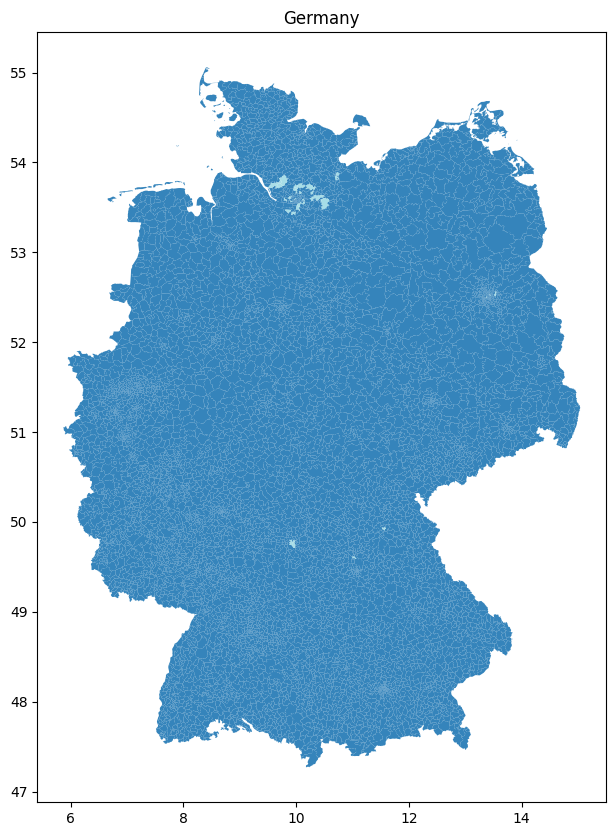

In [262]:
import geopandas as gpd
import matplotlib.pyplot as plt

plz_shape_df = gpd.read_file(DATA_DIR / "plz-5stellig.shp" / "plz-5stellig.shp", dtype={"plz": str})

# choose important plz
plz_shape_df["plz_in_data"] = np.where(plz_shape_df['plz'].isin(list(df_daily['plz'].unique().cast(pl.String))), 1, 0)
fig, ax = plt.subplots(figsize=(10, 10))

plz_shape_df.plot(ax=ax, column="plz_in_data", categorical=True, cmap='tab20', alpha=0.9)
ax.set(title='Germany')